# 16 - Exploratory Data Analysis (EDA)

## Introduction to EDA
**Exploratory Data Analysis (EDA)** is a critical step in any data science project. It involves visualizing and summarizing the data to understand its structure, distribution, and underlying patterns. EDA can help uncover trends, relationships between variables, and any anomalies that might require attention before modeling.

### Benefits of EDA:
1. **Data Cleaning**: Identify and handle missing or inconsistent data.

2. **Data Understanding**: Get an overall sense of the structure and quality of the data.

3. **Feature Selection**: Identify important variables for the model.

4. **Data Transformation**: Prepare the data for modeling (e.g., normalization, scaling).

5. **Detect Outliers**: Spot any extreme values that may distort the model.

The main purpose of **EDA** is to gain a deep understanding of the data, allowing us to make informed decisions about which modeling techniques to use, how to handle missing values, and how to engineer features that will improve model performance.

## Descriptive Analysis vs EDA
**Descriptive analysis** and **EDA**, depending on how they're implemented, may be equivalent, but we can distinguish them by their main differences:

- **Descriptive Analysis**: Focuses on describing the main characteristics of a data set using *descriptive statistics*, such as *mean*, *median*, *range*, and so on. Essentially, provides a clear and summarized description of the data.

- **EDA**: Goes a step further, as it focuses on exploring *patterns*, *relationships*, *anomalies*, etc., in the data using more sophisticated **graphs** and statistics. Its main objective is to understand **the structure of the data**, relationships between variables and to formulate **hypotheses** or **intuitions** for further analysis or modeling.

## Machine Learning Flow

<p align="center">
    <img src="imgs/eda1.png" alt="Alt text">
</p>

The ideal **Machine Learning Flow** should contain the following phases:

1. **Problem Definition**: A *need* is identified to be solved using Machine Learning.

2. **Dataset Acquisition**: Once the problem is defined, *data collection* becomes necessary. This can involve capturing data from various sources such as databases, APIs, web scraping, or real-time data streams.

3. **Store the Information**: The best way to store the information is in a *database* to ensure secure and efficient access. Flat files should be avoided when possible, since they're not secure or optimized for scalability and querying.

4. **Descriptive Analysis**: Before diving into EDA, it’s important to examine the raw data’s basic *statistical measures*—such as means, medians, distributions, and standard deviations—to understand its overall structure. Knowing these distributions helps in selecting an appropriate model later.

5. **EDA**: In this step, we explore the data more deeply to identify important features, eliminate irrelevant or redundant variables, and discover relationships between them. EDA also helps in identifying outliers and understanding the data’s complexities.

6. **Modeling and Optimization**: Once the data is prepared, it’s time to choose and train a model that best fits the data. After the initial training, *model optimization* is essential to improve performance through hyperparameter tuning or model refinement.

7. **Deployment**: After optimizing the model, it needs to be deployed into a controlled environment where it can make predictions on real-world data. This is where the model starts bringing value to end-users or business processes.

---
## Example: Titanic Dataset

### Steps 1 & 2: Problem Definition & Dataset Acquisition

#### Problem Definition:
Using the Titanic passenger data, we aim to predict whether a given passenger survived or not based on features such as *age*, *gender*, *passenger class*, *fare*, and other factors. This is a binary classification problem where the target variable is the `Survived` column, which takes on the values:

- `0`: Passenger did not survive

- `1`: Passenger survived

#### Key Objective:
The key objective is to build a machine learning model that can accurately predict the likelihood of a passenger surviving, given their individual characteristics. The output will be a probability or binary classification (survived vs. not survived).

#### Dataset Acquisiton
We'll use the Titanic dataset, which contains several features about each passenger that we’ll use to make our predictions.

First, let’s load the dataset and inspect its structure.

In [15]:
import pandas as pd

# Load Titanic dataset from URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Target Variable
The target variable (what we want to predict) is:

- `Survived`: This column indicates whether the passenger survived (`1`) or did not survive (`0`).

##### Features
Here are the main features of the dataset that will be used to predict survival:

- `PassengerId`:

    - **Description**: A unique identifier for each passenger.

    - **Usefulness**: This is simply an ID number and we can assume it doesn't provide any information for predicting survival. It will likely be dropped.

- `Pclass`:

    - **Description**: The passenger’s class (1st, 2nd, or 3rd).

    - **Usefulness**: This may be an important feature because we can assume survival rate varied significantly by class (e.g. Passengers in 1st class are known to have a higher chance of survival).

- `Name`:

    - **Description**: The full name of the passenger.

    - **Usefulness**: This feature doesn't provide predictive information for survival. However, we could extract titles (Mr., Mrs., etc.) from the names, which might be predictive, as they could be correlated with social status or age.

- `Sex`:

    - **Description**: The gender of the passenger.

    - **Usefulness**: This is a key feature, as women had a significantly higher survival rate than men.

- `Age`:

    - **Description**: The age of the passenger.

    - **Usefulness**: Age is likely important in determining survival, as younger passengers (e.g., children) were more likely to survive.

- `SibSp`:

    - **Description**: Number of siblings or spouses aboard the Titanic.

    - **Usefulness**: This feature indicates the family size and may help predict survival, as people traveling with families might have different survival rates compared to solo travelers.

- `Parch`:

    - **Description**: Number of parents or children aboard the Titanic.

    - **Usefulness**: Like `SibSp`, this feature indicates family size. It could also be used to understand whether passengers traveling with families had different survival rates.

- `Ticket`:

    - **Description**: The ticket number of the passenger.

    - **Usefulness**: The ticket number likely has little direct influence on survival, but patterns in ticket numbers (such as family tickets) could be explored. For most analyses, this column can be dropped.

- `Fare`:

    - **Description**: The fare paid for the ticket.

    - **Usefulness**: The fare could correlate with passenger class and possibly indicate a passenger’s wealth, which might influence survival. It’s a useful feature.

- `Cabin`:

    - **Description**: The cabin number where the passenger stayed.

    - **Usefulness**: This feature could provide some insight into the passenger’s location on the ship, which might influence survival.

- `Embarked`:

    - **Description**: The port where the passenger boarded the Titanic (C = Cherbourg; Q = Queenstown; S = Southampton).

    - **Usefulness**: This feature may provide some predictive value, as the port of embarkation could be related to socio-economic factors or access to lifeboats.

### Step 3: Store the Information
Once the dataset has been acquired and inspected, the next step is to store it securely.

While flat files like CSVs are commonly used for storing data, they are not ideal for large datasets or secure access. In professional settings, storing the data in a **database** ensures better security, scalability, and efficiency.

#### 1. Storing the Dataset as a CSV File:
We can first store the dataset as a flat CSV file, which is easy to share and load.

In [16]:
import os

# Define the path to store the dataset
output_dir = 'data/raw'
os.makedirs(output_dir, exist_ok=True)

# Store the dataset as a CSV file in the raw folder
df.to_csv(f'{output_dir}/titanic_raw.csv', index=False)

print(f'Dataset stored as {output_dir}/titanic_raw.csv')

Dataset stored as data/raw/titanic_raw.csv


This code saves the raw Titanic dataset in the `data/raw/` folder. The CSV file format is widely used and easy to work with, but as noted earlier, it is not the most secure or efficient format for long-term storage or querying.

#### 2. Storing the Dataset in a Database (Using SQLite):
For better security and more efficient data management, we can store the dataset in an SQLite database. SQLite is a lightweight, serverless database that works well for small projects. 

We'll use `SQLAlchemy`, a Python SQL toolkit, to interact with the SQLite database.

##### Step 1: Install SQLAlchemy (if needed)
You can install SQLAlchemy with the following command:

In [17]:
!pip install sqlalchemy

##### Step 2: Setting Up SQLAlchemy and SQLite
Here’s how you can store the Titanic dataset in an SQLite database using SQLAlchemy:

In [18]:
from sqlalchemy import create_engine

# Create an SQLite database (this will create a file called titanic.db)
engine = create_engine('sqlite:///data/titanic.db')

# Store the dataset in a table called 'titanic_data'
df.to_sql('Titanic_Data', con=engine, if_exists='replace', index=False)

print("Dataset stored in SQLite database as 'Titanic_Data' table.")

Dataset stored in SQLite database as 'Titanic_Data' table.


This stores the Titanic dataset as a table named titanic_data in a SQLite database located at `data/titanic.db`. If the table already exists, the `if_exists='replace'` option will replace it with the new data.

##### Step 3: Querying the Stored Data
Once the data is stored in the SQLite database, you can query it using SQL commands. For example, here’s how to load the stored data back into a pandas DataFrame:

In [19]:
# Query the data from the SQLite database
df_from_db = pd.read_sql('SELECT * FROM Titanic_Data', con=engine)

# Display the first few rows to confirm the data is loaded correctly
df_from_db.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


#### Why Store the Data in a Database?
Storing the data in a database offers several advantages:

1. **Security**: Databases can control access to data and prevent unauthorized use.

2. **Scalability**: Databases are optimized for handling large datasets and complex queries.

3. **Efficiency**: Querying data is faster in databases compared to reading from large flat files like CSVs.

### Step 4: Descriptive Analysis
Once the data is stored, the next phase in the Machine Learning Flow is **Descriptive Analysis**. In this step, we calculate and examine basic statistical measures to understand the distribution and structure of the dataset.

This analysis helps us gain a better sense of the data’s general characteristics, such as central tendencies, variability, and the presence of any outliers.

Let's start by generating descriptive statistics for numerical and categorical variables.

#### Descriptive Statistics for Numerical Variables
The `.describe()` function will output summary statistics for numerical variables such as:

- **Count**: The number of non-null entries.

- **Mean**: The average value.

- **Standard Deviation**: The spread of the data.

- **Minimum and Maximum**: The range of the data.

- **Quartiles**: The 25th, 50th (median), and 75th percentiles.

In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Descriptive Statistics for Categorical Variables
For categorical variables, we can examine how many distinct values each feature contains and how the values are distributed.

In [21]:
# Check the unique values in categorical columns
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Repeat this for other categorical columns like `Pclass`, `Embarked`, and `Survived` to understand the distribution of passengers by class, port of embarkation, and survival status.

In [22]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [23]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [24]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

#### Visualizing Distributions
To complement the summary statistics, it's important to visualize the distribution of the numerical features using histograms and boxplots. This will help us spot outliers and understand the spread of the data more clearly.

##### 1. Histograms for Numerical Features:

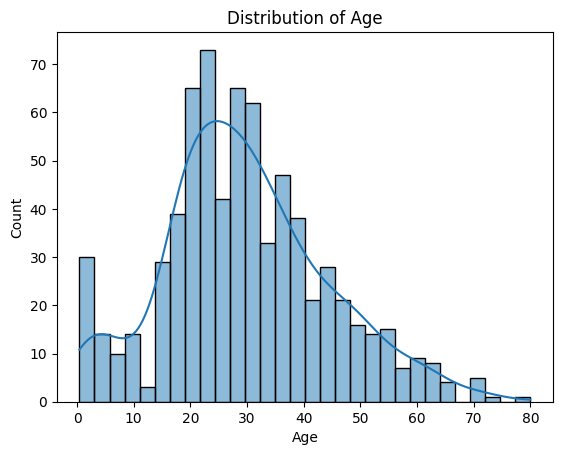

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram for the 'Age' column
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

This plot will show the distribution of ages among passengers. You can create similar plots for other numerical columns, such as `Fare`.

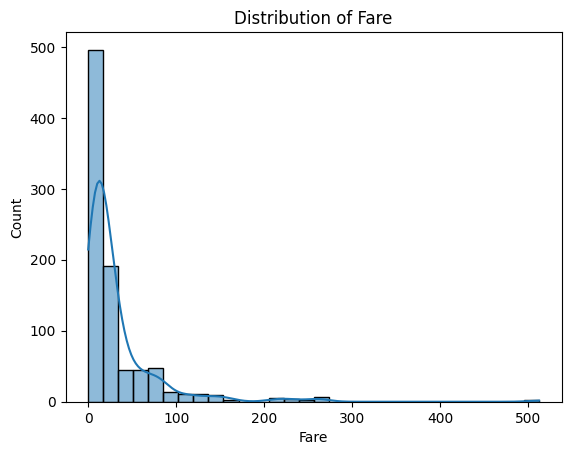

In [26]:
# Histogram for Fare
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.show()

##### 2. Boxplots for Outlier Detection:
Boxplots are useful for detecting outliers in the dataset. Let’s use a boxplot to examine the distribution of `Age` and spot any potential outliers.

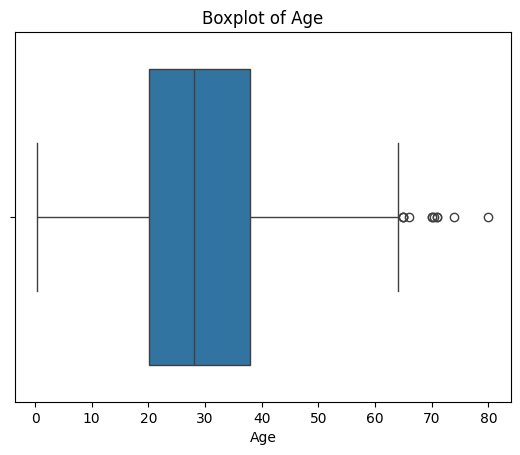

In [27]:
# Boxplot for Age
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

You can also create boxplots for `Fare` and other numerical features to check for outliers.

#### Insights from Descriptive Analysis
As you review the descriptive statistics and visualizations, you should start identifying patterns or potential issues:

1. **Missing Data**: From the summary statistics, we can see that `Age` has missing values. We’ll need to handle this later.

2. **Outliers**: The boxplot for `Fare` may show a few extreme values (outliers), which could affect the performance of machine learning models if left untreated.

3. **Class Imbalance**: The survival rate can be checked to see if there is a class imbalance. If significantly more passengers did not survive than those who did, it might affect the model’s performance.

In [28]:
# Check the survival rate (class balance)
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

This will output the percentage of passengers who survived vs. those who did not, helping you identify if class imbalance might be an issue for the model.

#### Conclusion of Descriptive Analysis

By performing descriptive analysis, we gain a clearer understanding of the dataset’s structure, and we can now move on to **Exploratory Data Analysis (EDA)**, where we’ll dive deeper into relationships between features and survival.

Additionally, the insights from this step (like missing values or outliers) will guide how we handle the data in later steps, such as feature engineering and modeling.

### Step 5: Exploratory Data Analysis